In [25]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
import string
import random
from cmath import sqrt
%matplotlib widget

# Ejercicio 2
Implemente un algoritmo de optimizaciónn por enjambre de partículas y utilice el mismo para encontrar el mínimo global de las funciones del Ejercicio 1. Compare los resultados, en términos de las soluciones encontradas y de la velocidad de convergencia, obtenidos con este método y con el algoritmo genético.

dipercia me dijo q hagamos una animacion de los bichitos en cada tiempo osea iteracion

## Definición de las funciones a utilizar

In [26]:
def func_1 (x):
    f_x = -x* math.sin(math.sqrt(abs(x)))
    return f_x

In [27]:
def func_2 (x):
    f_x = x + 5*math.sin(3*x) + 8*math.cos(5*x)
    return f_x

In [28]:
def func_3 (x, y):
    a = x ** 2 + y ** 2
    f_x = np.power(a, 0.25) * (np.sin(50 * np.power(a, 0.1)) ** 2  + 1)
    return f_x

In [29]:
def actualizar_mejores (f,k,x,yk,yk_global,f_v,counter):
    #pregunto si tiene 1 o 2 dimensiones
    if(f==func_3):
        f_v.append(f(x[k][0],x[k][1]))
        #actualizacion de posiciones mejores
        if(f(x[k][0],x[k][1]) < f(yk[k][0],yk[k][1])):
            yk[k]=x[k]
        if(f(yk[k][0],yk[k][1]) < f(yk_global[0],yk_global[1])):
            yk_global=yk[k]
            counter=0
    else:
        f_v.append(f(x[k]))
        #actualizacion de posiciones mejores
        if(f(x[k]) < f(yk[k])):
            yk[k]=x[k]
        if(f(yk[k]) < f(yk_global)):
            yk_global=yk[k]
            counter=0
    return yk,yk_global,counter

In [30]:
def limitador (f,x,k,lim_inf,lim_sup):
    #pregunto si tiene 1 o 2 dimensiones
    if(f==func_3):
        #limitador en x
        if(x[k][0] < lim_inf):
            x[k][0] = lim_inf
        if(x[k][0] > lim_sup):
            x[k][0] = lim_sup
        #limitador en y
        if(x[k][1] < lim_inf):
            x[k][1] = lim_inf
        if(x[k][1] > lim_sup):
            x[k][1] = lim_sup
    else:
        if(x[k] < lim_inf):
            x[k] = lim_inf
        if(x[k] > lim_sup):
            x[k] = lim_sup
    return x

In [31]:
def alg_enjambre (particulas,lim_inf,lim_sup,f,c1,c2):
    
    if(f==func_3):
        x=np.random.uniform(lim_inf,lim_sup,(particulas,2)) #entradas
        v=np.zeros((x.shape[0],2)) #vector de velocidades
    else:
        x=np.random.uniform(lim_inf,lim_sup,particulas) #entradas
        v=np.zeros((x.shape[0],1)) #vector de velocidades
    #mejor posicion personal
    yk=np.copy(x)
    yk_global=yk[0] #mejor posicion global
    counter=0
    # print(v)
    # variables para animacion
    anim_x=[] 
    anim_y=[]
    while (counter!=16):
        # print(counter)
        f_v = []
        for k in range(particulas):
            # print(f'particula [{k}] f[x] = {f(x[k][0],x[k][1])} ,  f[yk] = {f(yk[k][0],yk[k][1])}  fk_globabl= {f(yk_global[0],yk_global[1])}')
            # print(f'particula [{k}] f[x] = {f(x[k])} ,  f[yk] = {f(yk[k])}  fk_globabl= {f(yk_global)}')
            yk,yk_global,counter=actualizar_mejores (f,k,x,yk,yk_global,f_v,counter)

        anim_x.append(x)
        anim_y.append(f_v)
        for k in range(particulas):
            #variables aleatorias
            r_1 = np.random.rand(x.ndim)
            r_2 = np.random.rand(x.ndim)
            #actualizacion de la velocidad
            v_next = v[k] + (c1*r_1)*(yk[k]-x[k]) + (c2*r_2)*(yk_global-x[k])
            # print(v_next,v[k])
            v[k] = v_next
            # if(c1!=0.1):
            #     c1=c1-0.01
            # if(c2!=1):
            #     c2=c2+0.01
            #actualizacion de la posicion
            x[k]=x[k]+v[k]
            x=limitador (f,x,k,lim_inf,lim_sup)
            # print(f'9  particula [{k}] f[yk] = {f(yk[k])}')
        counter= counter + 1
    return yk_global, anim_x, anim_y
          
    

## Resolución de la función 1

In [46]:
# alg_enjambre (particulas, lim_inf, lim_sup, f, c1, c2)
winner, anim_x, anim_y = alg_enjambre(10, -512, 512, func_1, 0.1, 0.1)
print(func_1(winner))
print(anim_x)

-418.98285194663595
[array([512.        , 414.10973383, 499.08853236, 511.27357913,
       422.24716067, 420.98547818, 512.        , 499.3264145 ,
       433.97673259, 426.15094458]), array([512.        , 414.10973383, 499.08853236, 511.27357913,
       422.24716067, 420.98547818, 512.        , 499.3264145 ,
       433.97673259, 426.15094458]), array([512.        , 414.10973383, 499.08853236, 511.27357913,
       422.24716067, 420.98547818, 512.        , 499.3264145 ,
       433.97673259, 426.15094458]), array([512.        , 414.10973383, 499.08853236, 511.27357913,
       422.24716067, 420.98547818, 512.        , 499.3264145 ,
       433.97673259, 426.15094458]), array([512.        , 414.10973383, 499.08853236, 511.27357913,
       422.24716067, 420.98547818, 512.        , 499.3264145 ,
       433.97673259, 426.15094458]), array([512.        , 414.10973383, 499.08853236, 511.27357913,
       422.24716067, 420.98547818, 512.        , 499.3264145 ,
       433.97673259, 426.15094458]), a

In [59]:
len(anim_x)

16

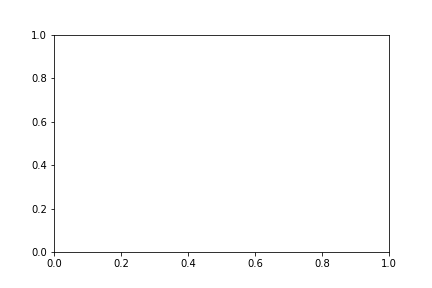

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget
 
points = [(0.1, 0.5), (0.5, 0.5), (0.9, 0.5)]

fig, ax = plt.subplots(1, 1)
# fig.set_size_inches(5,5)

def animate(i):
    ax.clear()
    # Get the point from the points list at index i
    point_x = anim_x[i]
    point_y = anim_y[i]
    # Plot that point using the x and y coordinates
    ax.scatter(point_x, point_y, c = 'green')
    # Set the x and y axis to display a fixed range
    # ax.set_xlim([0, 1])
    # ax.set_ylim([0, 1])
    ax.set_title(f'Partículas it {i}')
anim = FuncAnimation(fig, animate, frames=len(anim_x),
                    interval=500, repeat=False)


## Resolución de la función 2

In [33]:
winner, anim_x, anim_y = alg_enjambre(7,0,20,func_2,1.2,1)
print(func_2(winner))

-9.43383681657308


-9.352864532857351


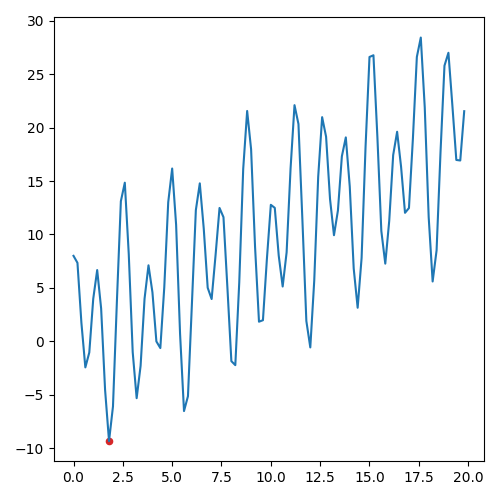

In [34]:
anim_fig = plt.figure(figsize=(5, 5), tight_layout=True)
x=np.arange(0,20,0.2)
y=[]
for i in x:
    y.append(func_2(i))
min=np.argmin(y)
plt.scatter(x[min],y[min],s=20,c='C3')
plt.plot(x,y)
print(y[min])
plt.show()

## Resolución de la función 3

In [35]:
winner, anim_x, anim_y = alg_enjambre(400,-100,100,func_3,0.05,0.01)
print(winner[0],winner[1],func_3(winner[0],winner[1]))
print(func_3(winner[0],winner[1]))

0.028818382450763957 0.01058724789011975 0.18364612144582046
0.18364612144582046


0.0


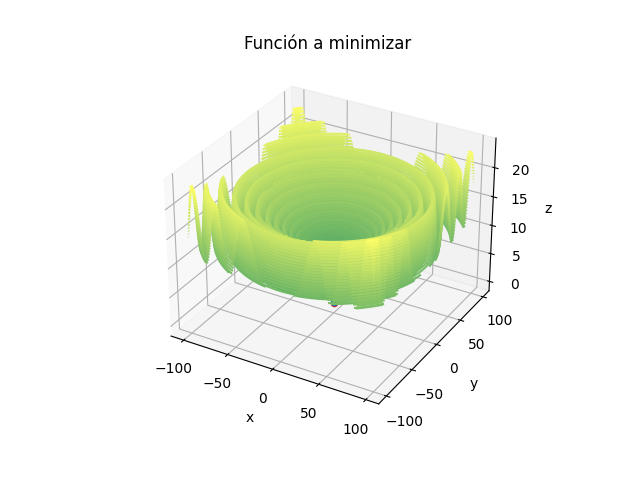

In [36]:
%matplotlib widget
x = np.arange(-100, 100, 1)
y = np.arange(-100, 100, 1)

X, Y = np.meshgrid(x, y)
Z = func_3(X, Y)
z=[]
for i in range(x.shape[0]):
    z.append(func_3(x[i],y[i]))

min=np.argmin(z)
print(z[min])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='summer')
ax.scatter(x[min],y[min],z[min],c='C3')
ax.scatter(winner[0],winner[1],func_3(winner[0],winner[1]))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Función a minimizar')
plt.show()